In [2]:
k=6 
import cv2 as cv
import numpy as np

N = 5
global n 
n = 0 
ps=[]
ims=[]
ims_copy=[]
params=[]
def draw_circle(event,x,y,flags,param):
    global n
    p = param[0]
    if event == cv.EVENT_LBUTTONDOWN:
        cv.circle(param[1],(x,y),5,(255,0,0),-1)        
        p[n] = (x,y)
        n += 1
for i in range(1,k+1):
    p=np.empty((N,2))
    ps.append(p)
    im=cv.imread('images/graf/img%d.ppm'%i, cv.IMREAD_ANYCOLOR)
    name='Image %d'%i
    imcopy=im.copy()
    ims.append(im)
    ims_copy.append(imcopy)
    
    param=[p,imcopy]
    n=0
    cv.namedWindow(name, cv.WINDOW_AUTOSIZE)
    cv.setMouseCallback(name,draw_circle, param)

    while(1):
        cv.imshow(name, imcopy)
        if n == N:
            break
        if cv.waitKey(20) & 0xFF == 27:
            break

    A = np.empty((2*N, 9))
    cv.destroyAllWindows()

(1040, 3800, 3)


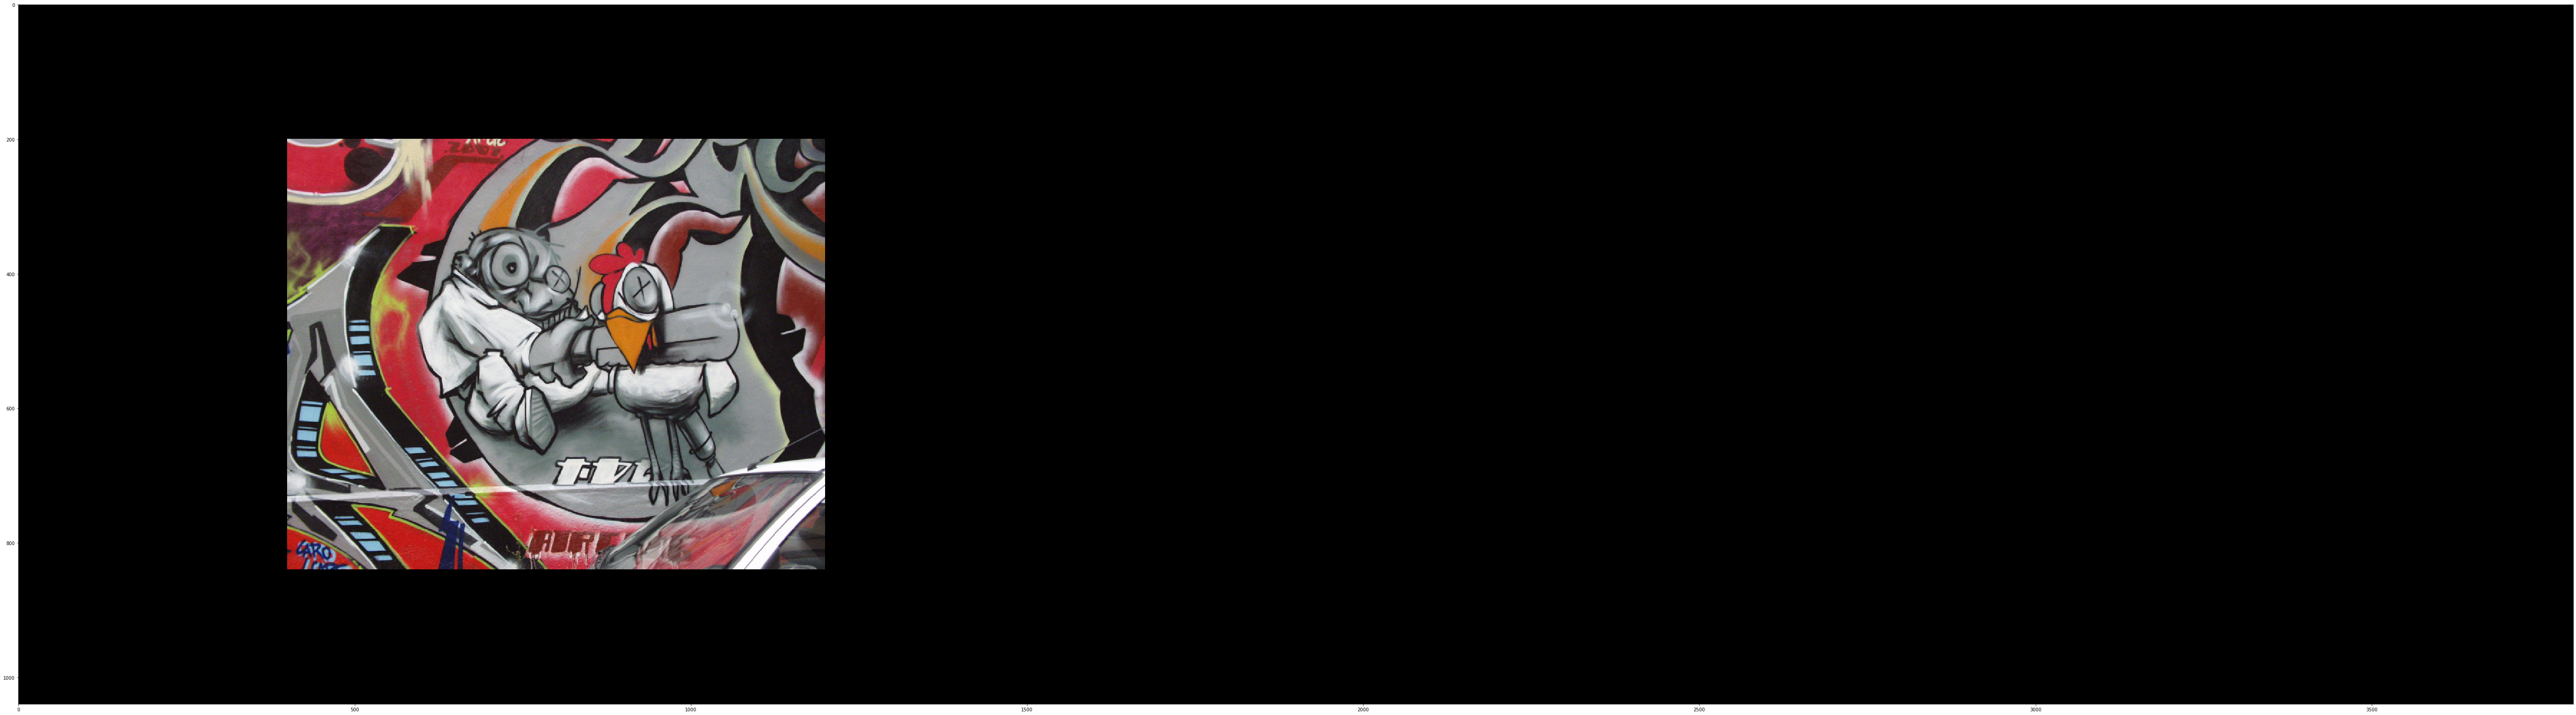

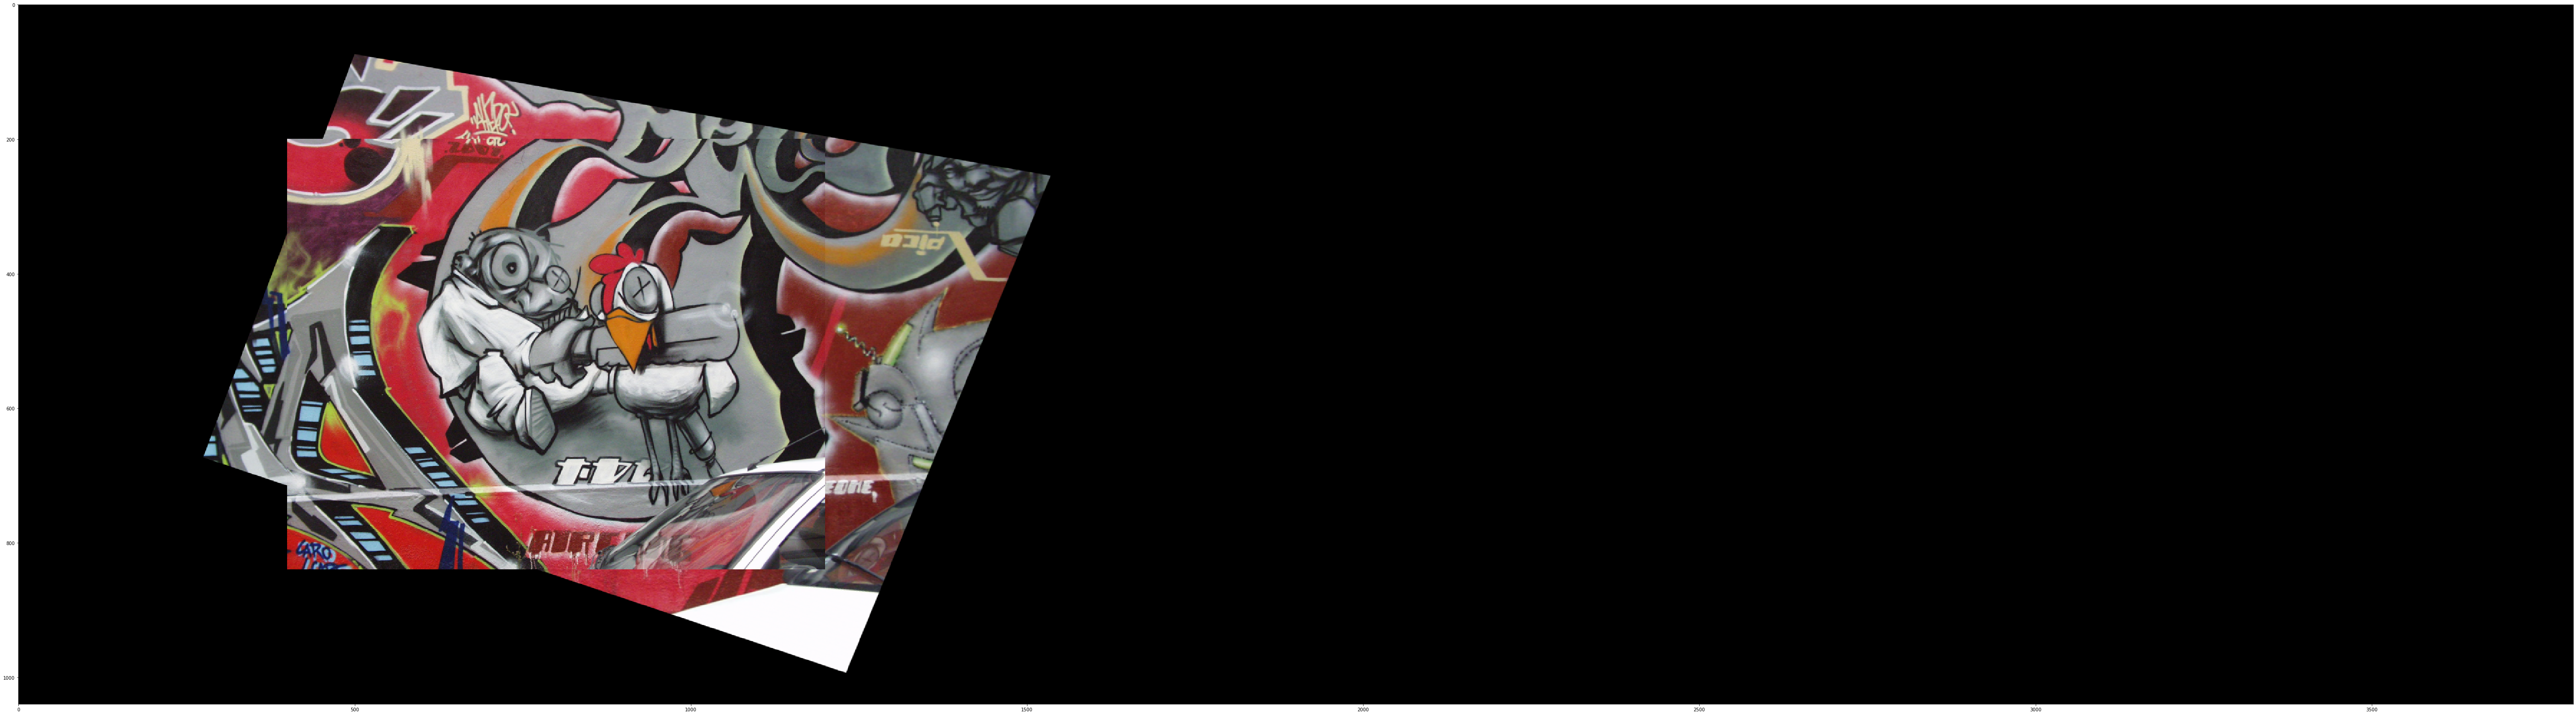

KeyboardInterrupt: 

In [7]:
height=400
width=3000
shiftx=400
shifty=200


import matplotlib.pyplot as plt
pts_ref=ps[0]
im_ref=ims[0]
shape=(im_ref.shape[1]+width,im_ref.shape[0]+height)
blank=np.zeros((im_ref.shape[0]+height,im_ref.shape[1]+width,3),dtype='uint8')
blank[shifty:im_ref.shape[0]+shifty, shiftx:im_ref.shape[1]+shiftx] = im_ref
print(blank.shape)
blank_cvt=cv.cvtColor(blank,cv.COLOR_BGR2RGB)
plt.figure(figsize=(100,100))
plt.imshow(blank_cvt)
plt.show()
homs=[]
#homographic=
for i in range(1,len(ps)):
    pts_dst=pts_ref[0:4]+[shiftx,shifty]
    pts_src=ps[i][0:4]
    im_dst=im_ref
    im_src=ims[i]

    h, status = cv.findHomography(pts_src, pts_dst)
    hom = cv.warpPerspective(im_src, h, shape)
    homs.append(hom)
    blank+=(blank==0)*hom
    hom_dir='stitched_images/stitched_%d.jpeg'%i
    cv.imwrite(hom_dir,blank)
    blank_cvt=cv.cvtColor(blank,cv.COLOR_BGR2RGB)
    #blank_cvt=cv.cvtColor(blank_cvt,cv.COLOR_BGR2RGB)
    plt.figure(figsize=(100,100))
    plt.imshow(blank_cvt)
    plt.show()
